# Problem Statement 
- Perform Exploratory Data Analysis on Superstore Dataset. 
- As a Business Manager , try to find out the weak areas where you can make profit. What all business problems you can derive out of this?

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Basic Understanding 

In [2]:
#Reading the data set 
df = pd.read_csv('SampleSuperstore.csv')

In [3]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
#Checking data types 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


**Observation** : The data types of variables seems to be correct

In [5]:
#Checking for null values
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

**Observation** :There seem to be no null values

In [6]:
#Checking unique values under each category 
df.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [7]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


**Observation** : There seems to be a wide gap in 75th percentile and maximum number for Sales and Profit. 

We will perform Outlier Analysis to understand this gap and check for irrelevant outliers

### Outlier Analysis 

<AxesSubplot:xlabel='Quantity'>

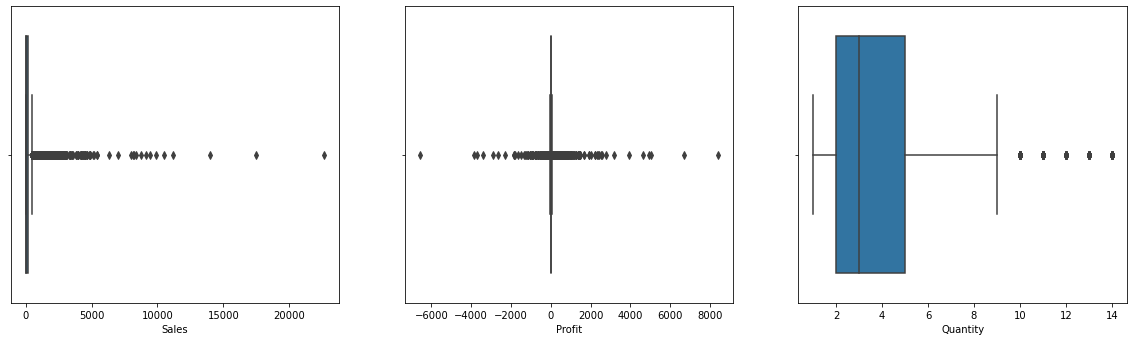

In [8]:
#plotting to check outliers 
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x='Sales',data=df)
plt.subplot(2,3,2)
sns.boxplot(x='Profit',data=df)
plt.subplot(2,3,3)
sns.boxplot(x='Quantity',data=df)

**Observation** : There seems to be a consistancy in the outlier value present across Sales, Price and Quantity.

In [9]:
#Checking the accurate position of outlier for Sales
percentiles_Sales = df.Sales.quantile([0.01,0.5,0.70,0.90,0.95,0.99])
max_Sales = df.Sales.max()
print('Max of Sales = {0}'.format(max_Sales))
print(percentiles_Sales)

Max of Sales = 22638.48
0.01       2.286000
0.50      54.490000
0.70     158.376000
0.90     572.706000
0.95     956.984245
0.99    2481.694600
Name: Sales, dtype: float64


In [10]:
#Checking the accurate position of outlier for Profit 
percentiles_Profit=df.Profit.quantile([0.01,0.5,0.70,0.90,0.95,0.99])
max_Profit = df.Profit.max()
print('Max of Profit = {0}'.format(max_Profit))
print(percentiles_Profit)

Max of Profit = 8399.976
0.01   -319.264953
0.50      8.666500
0.70     22.200000
0.90     89.281620
0.95    168.470400
0.99    580.657882
Name: Profit, dtype: float64


In [11]:
#Checking the accurate position of outlier for Quantity 
percentiles_Quantity=df.Quantity.quantile([0.01,0.5,0.70,0.90,0.95,0.99])
max_Quantity = df.Quantity.max()
print('Max of Quantity = {0}'.format(max_Quantity))
print(percentiles_Quantity)

Max of Quantity = 14
0.01     1.0
0.50     3.0
0.70     5.0
0.90     7.0
0.95     8.0
0.99    11.0
Name: Quantity, dtype: float64


**Observations** : 
- The outlier in case of Sales and Profit seems to lie in 99th Percentile. 
- There is also a considerable amount of jump in quantity after 99th percentile

**Outlier Treatment** : We cant really remove this outlier from data as from the business point of view, this could be a result of a particularly higher amount of sales, with larger quantities and thus generating high profit. 

In [12]:
#Dropping postal code as it has no such significance
df=df.drop('Postal Code',axis=1)

## Univariate and Bivariate Analysis

In [13]:
#Having a look at the columns 
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Region',
       'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

- **Aim**: To find weak areas to generate more profit.
- **Approach** : We will have a simultaneous univariate and bivariate analysis to identify the weak areas and push forward effective solutions 

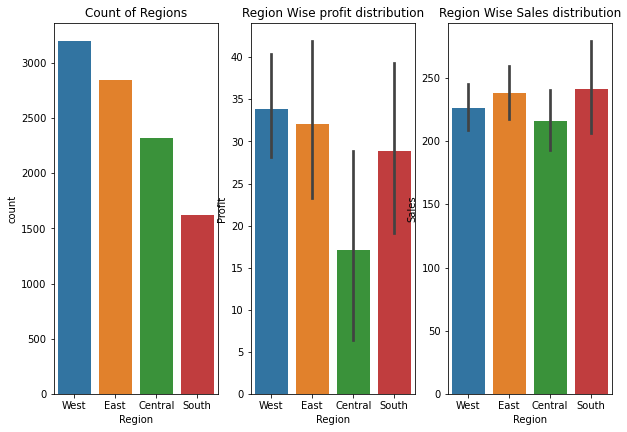

In [14]:
#Having a look at Regions
plt.figure(figsize=(10,15))
plt.subplot(2,3,1)
sns.countplot(x='Region', data=df,order=df.Region.value_counts().index)
plt.title('Count of Regions')
plt.subplot(2,3,2)
sns.barplot(x='Region',y='Profit',data=df, order=df.Region.value_counts().index)
plt.title('Region Wise profit distribution')
plt.subplot(2,3,3)
sns.barplot(x='Region',y='Sales',data=df, order=df.Region.value_counts().index)
plt.title('Region Wise Sales distribution')
plt.show()

**How to improve weak areas in Regions to increase profit**
- There are comparitively high number of sales from central region, but they generate comparitively less profit. Pushing forward higher volumes of sales here can help in increasing the profit. 

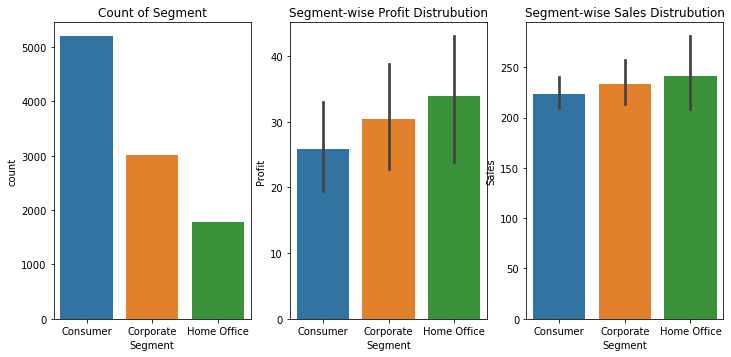

In [15]:
#Having a look at Segments
plt.figure(figsize=(12,12))
plt.subplot(2,3,1)
sns.countplot(x='Segment', data=df,order=df['Segment'].value_counts().index)
plt.title('Count of Segment')
plt.subplot(2,3,2)
sns.barplot(x='Segment',y='Profit',data=df, order=df['Segment'].value_counts().index)
plt.title('Segment-wise Profit Distrubution')
plt.subplot(2,3,3)
sns.barplot(x='Segment',y='Sales',data=df, order=df['Segment'].value_counts().index)
plt.title('Segment-wise Sales Distrubution')
plt.show()

**How to improve weak areas in Segments to increase profit**
- The consumer segment has the highest demand however the lowest sales and profit. This means they geenrally buy chepaer products. Increasing volume of sales in consumer segment can help in enerating bugger sum of profit. 
- Home office segment seems to have highest sales and profit. However, it has comparitevly less amount of orders as compared to other segments. By attempting to increase number of orders here, sales can further increase and so can the profit. 

In [16]:
#Having a look at City
df.City.value_counts()

New York City      915
Los Angeles        747
Philadelphia       537
San Francisco      510
Seattle            428
                  ... 
Glenview             1
Missouri City        1
Rochester Hills      1
Palatine             1
Manhattan            1
Name: City, Length: 531, dtype: int64

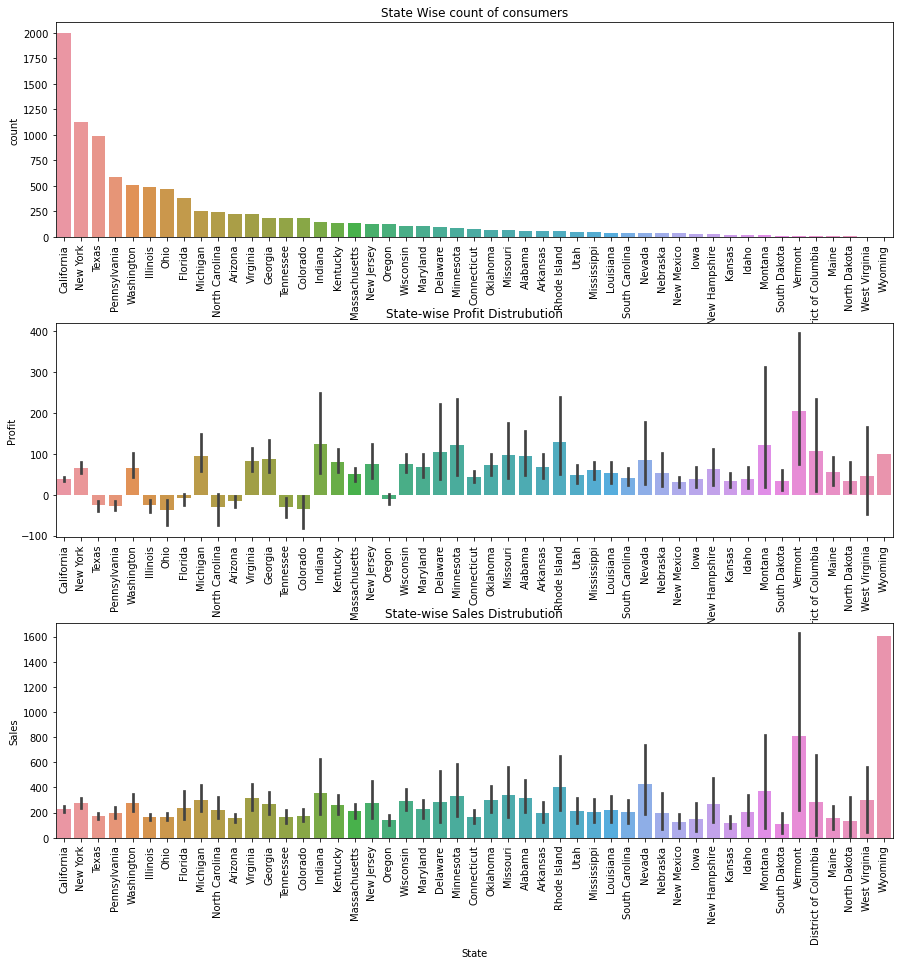

In [17]:
#Having a look at State
plt.figure(figsize=(15,15))
plt.subplot(3,1,1)
sns.countplot(x='State', data=df,order=df['State'].value_counts().index)
plt.title('State Wise count of consumers')
plt.xticks(rotation=90)
plt.subplot(3,1,2)
sns.barplot(x='State',y='Profit',data=df, order=df['State'].value_counts().index)
plt.title('State-wise Profit Distrubution')
plt.xticks(rotation=90)
plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.subplot(3,1,3)
sns.barplot(x='State',y='Sales',data=df, order=df['State'].value_counts().index)
plt.xticks(rotation=90)
plt.title('State-wise Sales Distrubution')
plt.show()

**How to improve weak areas in Segments to increase profit**
- California seems to have higest demand however comparitively lower profits and sales. This means the demand cheaper products. Increasing volume of sales here or advertising more for expensive products can help in enerating bigger sum of profit. 
- Vermont generates highest amount of sales and profit. However, as compared to other cities, it has very few orders. By trying to increase orders from Vermont, the profit can further increase. 
- Montana and Wyoming also follow similar trends as Vermont. Hence, they can also be focused on better

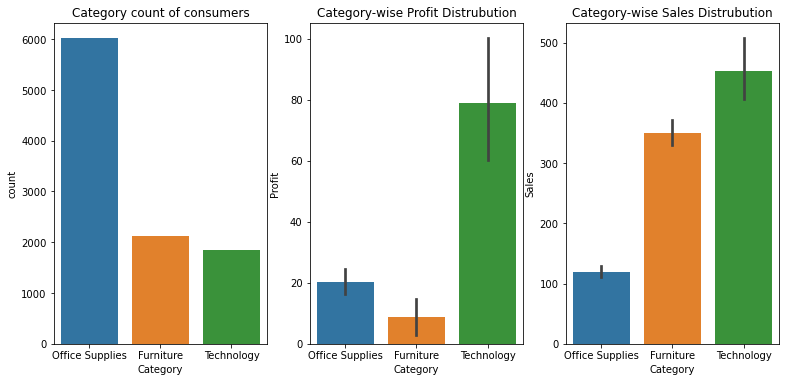

In [18]:
#Having a look at Category
plt.figure(figsize=(13,13))
plt.subplot(2,3,1)
sns.countplot(x='Category', data=df,order=df['Category'].value_counts().index)
plt.title('Category count of consumers')
plt.subplot(2,3,2)
sns.barplot(x='Category',y='Profit',data=df, order=df['Category'].value_counts().index)
plt.title('Category-wise Profit Distrubution')
plt.subplot(2,3,3)
sns.barplot(x='Category',y='Sales',data=df, order=df['Category'].value_counts().index)
plt.title('Category-wise Sales Distrubution')
plt.show()

**How to improve weak areas in Segments to increase profit**
- Consumers buy office supplies the most, however the sales and profit are comparitively low. 
- Technology category generates highest sales and profit however it has less orders as compared to other categories. Better focus on pushign forward technology category products, can improve the sales and profit. 

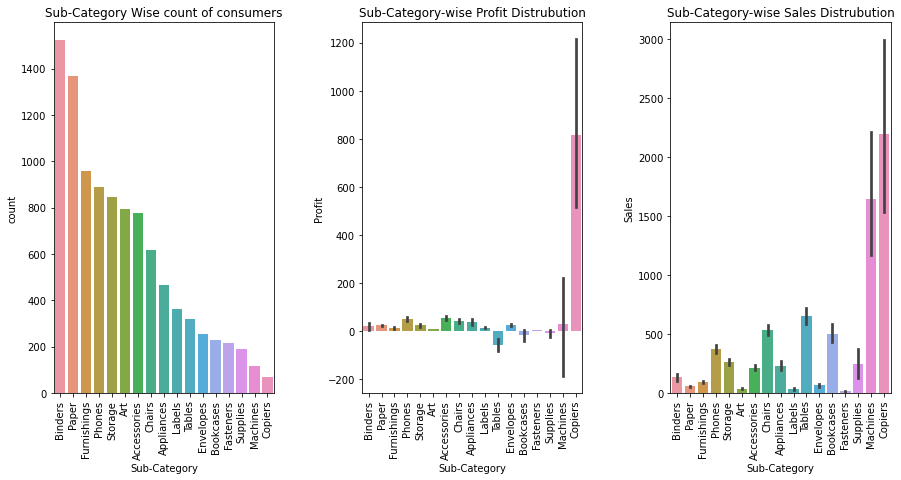

In [19]:
#Having a look at Sub-Category
plt.figure(figsize=(15,15))
plt.subplot(2,3,1)
sns.countplot(x='Sub-Category', data=df,order=df['Sub-Category'].value_counts().index)
plt.title('Sub-Category Wise count of consumers')
plt.xticks(rotation=90)
plt.subplot(2,3,2)
sns.barplot(x='Sub-Category',y='Profit',data=df, order=df['Sub-Category'].value_counts().index)
plt.title('Sub-Category-wise Profit Distrubution')
plt.xticks(rotation=90)
plt.subplots_adjust(wspace=0.4)
plt.subplot(2,3,3)
sns.barplot(x='Sub-Category',y='Sales',data=df, order=df['Sub-Category'].value_counts().index)
plt.title('Sub-Category-wise Sales Distrubution')
plt.xticks(rotation=90)
plt.show()

**How to improve weak areas in Segments to increase profit**
- Copiers form a small proportion of consumption owever contribute highes to sales and proifts. Pushing towards increasing their sales can help.

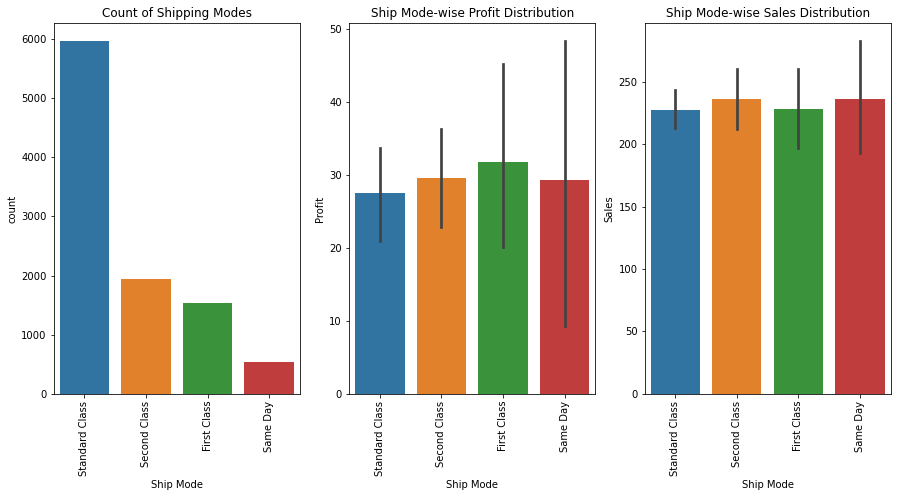

In [20]:
#Having a look at Ship Modes 
plt.figure(figsize=(15,15))
plt.subplot(2,3,1)
sns.countplot(x='Ship Mode', data=df,order=df['Ship Mode'].value_counts().index)
plt.title('Count of Shipping Modes')
plt.xticks(rotation=90)
plt.subplot(2,3,2)
sns.barplot(x='Ship Mode',y='Profit',data=df, order=df['Ship Mode'].value_counts().index)
plt.title('Ship Mode-wise Profit Distribution')
plt.xticks(rotation=90)
plt.subplot(2,3,3)
sns.barplot(x='Ship Mode',y='Sales',data=df, order=df['Ship Mode'].value_counts().index)
plt.title('Ship Mode-wise Sales Distribution')
plt.xticks(rotation=90)
plt.show()

### Business Problems 

In [21]:
df.head()

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [22]:
#Cities with maximum sales
top_cities = df.groupby('City')['Sales'].sum().sort_values(ascending=False).iloc[0:5]

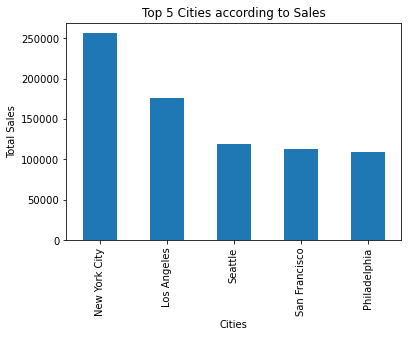

In [23]:
top_cities.plot(kind='bar')
plt.title('Top 5 Cities according to Sales')
plt.xlabel('Cities')
plt.ylabel('Total Sales')
plt.show()

In [24]:
df['Category_Sub-Category']=df['Category']+'_'+df['Sub-Category']

In [25]:
df.head()

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Category_Sub-Category
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136,Furniture_Bookcases
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820,Furniture_Chairs
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714,Office Supplies_Labels
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310,Furniture_Tables
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164,Office Supplies_Storage


In [26]:
#Top Category and Sub-Category Combination 
Best_Combination = df.groupby('Category_Sub-Category')['Profit'].sum().sort_values(ascending=False).iloc[0:5]
Best_Combination

Category_Sub-Category
Technology_Copiers         55617.8249
Technology_Phones          44515.7306
Technology_Accessories     41936.6357
Office Supplies_Paper      34053.5693
Office Supplies_Binders    30221.7633
Name: Profit, dtype: float64

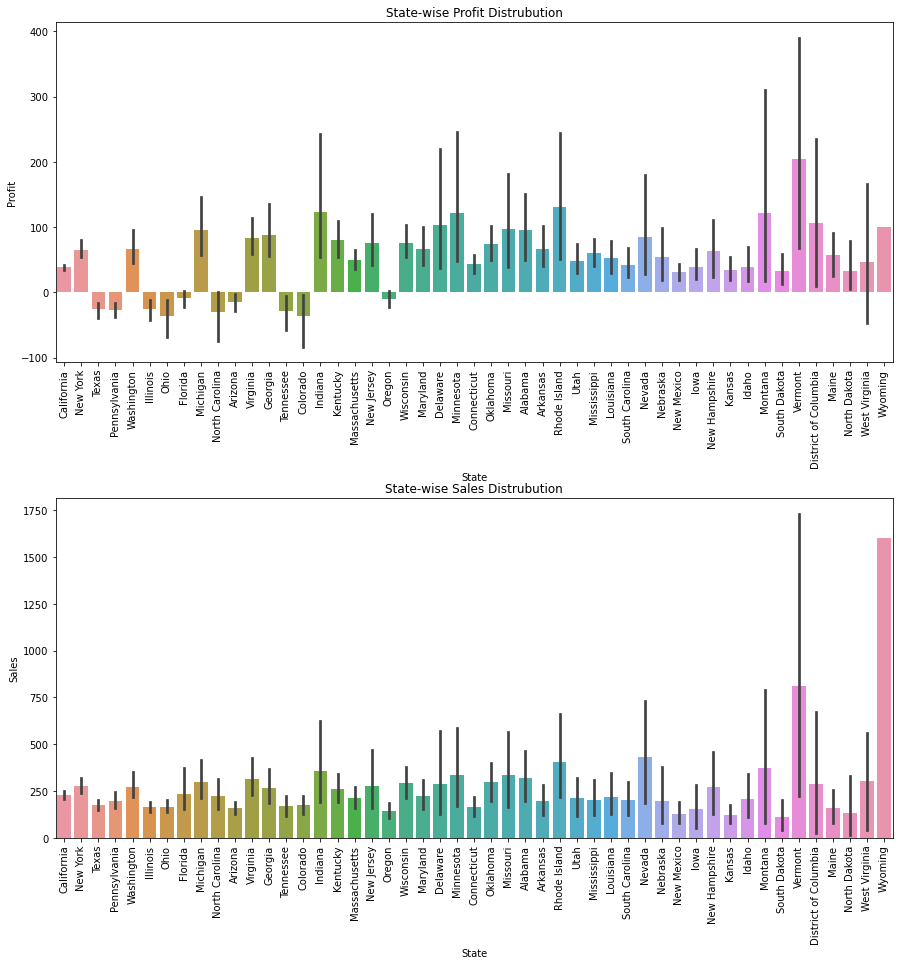

In [27]:
# Sales vs Profit of Cities 

plt.figure(figsize=(15,15))
plt.subplot(2,1,1)
sns.barplot(x='State',y='Profit',data=df, order=df['State'].value_counts().index)
plt.title('State-wise Profit Distrubution')
plt.xticks(rotation=90)
plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.subplot(2,1,2)
sns.barplot(x='State',y='Sales',data=df, order=df['State'].value_counts().index)
plt.xticks(rotation=90)
plt.title('State-wise Sales Distrubution')
plt.show()

### Observation
- Cities like Texas and Pennslyvania have high sales, however still generate low profit. Maybe stores in these areas should be reconsidered